# Fundamentos de Data Science
Analisis de la **Satisfacción de Clientes en la Industria Hotelera**

### Requisitos
Se debe limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

### Dataset
hotel booking demand datasets
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data


### Carga y Visualizacion de datos
* Se importa las librerias necesarias para el analisis del dataset
* Se carga del dataset (archivo .csv) 
* Se visualiza la cantidad d registros y columnas
* Se muestran los primeros 5 registros 

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import time

In [2]:
# Cargar el dataset
path = r'C:\Users\romi_\repositorios\Examen_de_Certificacion-Version_C\data\hotel_bookings.csv'
df = pd.read_csv(path)
# Imprime la forma del dataset (registros, columnas)
print(df.shape)
# Muestra los 5 primeros registros del dataset
df.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Proporciona un resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Limpieza de datos con Python

##### **Detección y eliminación de valores duplicados:** cada registro en el dataset debe ser único.

In [4]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Eliminar registros duplicados
df.drop_duplicates(inplace=True)
# Verificar el número de registros después de eliminar duplicados
print(f"Número de registros después de eliminar duplicados: {df.shape[0]}")

# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head(10)

Número de registros después de eliminar duplicados: 87396
Número de registros duplicados: 0


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


##### **Verificación y ajuste de tipos de datos:** las columnas deben coincidir con los tipos de datos indicados en el diccionario de datos.

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Crear un diccionario para convertir los nombres de los meses a números
mes_a_numero = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Reemplazar el nombre del mes por su número correspondiente
df['arrival_date_month_num'] = df['arrival_date_month'].map(mes_a_numero)

# Crear la nueva columna 'arrival_date' combinando año, mes y día
df['arrival_date'] = pd.to_datetime(
    df[['arrival_date_year', 'arrival_date_month_num', 'arrival_date_day_of_month']].rename(
        columns={'arrival_date_year': 'year', 'arrival_date_month_num': 'month', 'arrival_date_day_of_month': 'day'})
)

# Agrupar las columnas en una sola llamada 'arrival_date_combined'
df['arrival_date_combined'] = df['arrival_date'].dt.strftime('%Y-%m-%d')

# Opcional: Eliminar las columnas que ya no son necesarias, excepto 'arrival_date_week_number'
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_month_num', 'arrival_date_day_of_month', 'arrival_date_combined'], inplace=True)

# Verificar el resultado
print(df.shape)
df.head()

(87396, 30)


,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent               

In [9]:
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'hotel': 'string',
    'is_canceled': 'int64',
    'lead_time': 'int64',
    'arrival_date_week_number': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'float64',
    'babies': 'int64',
    'meal': 'string',
    'country': 'string',
    'market_segment': 'string',
    'distribution_channel': 'string',
    'is_repeated_guest': 'int64',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'string',
    'assigned_room_type': 'string',
    'booking_changes': 'int64',
    'deposit_type': 'string',
    'agent': 'string',
    'company': 'string',
    'days_in_waiting_list': 'int64',
    'customer_type': 'string',
    'adr': 'float64',
    'required_car_parking_spaces': 'int64',
    'total_of_special_requests': 'int64',
    'reservation_status': 'string',
    'reservation_status_date': 'date',
    'arrival_date': 'date'
}

In [10]:
# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'int64': 'int64',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto


In [ ]:
# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)


Diccionario Mapeado para pandas:
{'hotel': 'string', 'is_canceled': 'int64', 'lead_time': 'int64', 'arrival_date_week_number': 'int64', 'stays_in_weekend_nights': 'int64', 'stays_in_week_nights': 'int64', 'adults': 'int64', 'children': 'float64', 'babies': 'int64', 'meal': 'string', 'country': 'string', 'market_segment': 'string', 'distribution_channel': 'string', 'is_repeated_guest': 'int64', 'previous_cancellations': 'int64', 'previous_bookings_not_canceled': 'int64', 'reserved_room_type': 'string', 'assigned_room_type': 'string', 'booking_changes': 'int64', 'deposit_type': 'string', 'agent': 'string', 'company': 'string', 'days_in_waiting_list': 'int64', 'customer_type': 'string', 'adr': 'float64', 'required_car_parking_spaces': 'int64', 'total_of_special_requests': 'int64', 'reservation_status': 'string', 'reservation_status_date': 'datetime64[ns]', 'arrival_date': 'datetime64[ns]'}


In [12]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches


In [ ]:
# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Discrepancias encontradas en los tipos de datos:
- Columna 'hotel': Tipo actual -> object, Tipo esperado -> string
- Columna 'meal': Tipo actual -> object, Tipo esperado -> string
- Columna 'country': Tipo actual -> object, Tipo esperado -> string
- Columna 'market_segment': Tipo actual -> object, Tipo esperado -> string
- Columna 'distribution_channel': Tipo actual -> object, Tipo esperado -> string
- Columna 'reserved_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'assigned_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'deposit_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'agent': Tipo actual -> float64, Tipo esperado -> string
- Columna 'company': Tipo actual -> float64, Tipo esperado -> string
- Columna 'customer_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'reservation_status': Tipo actual -> object, Tipo esperado -> string
- Columna 'reservation_status_date': Tipo actual -> object, Tipo esperado ->

In [14]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df


In [ ]:
# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


##### **Consistencia en valores categóricos:** Identificar y corrigir cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [ ]:
# Iterar a través de cada columna del DataFrame
for columna in df.columns:
    # Obtener los valores únicos de la columna
    valores_unicos = df[columna].dropna().unique()
    print(f"Valores únicos en la columna '{columna}': {valores_unicos}")


Valores únicos en la columna 'hotel': <StringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: string
Valores únicos en la columna 'is_canceled': [0 1]
Valores únicos en la columna 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 1

In [ ]:
# Lista de columnas categóricas a revisar
categorical_cols = [
    'meal', 
    'country', 
    'market_segment', 
    'distribution_channel', 
    'customer_type', 
    'reserved_room_type', 
    'assigned_room_type',
    'hotel', 
    'deposit_type', 
    'reservation_status', 
    'is_canceled', 
    'is_repeated_guest'
]

# Diccionario para almacenar los valores únicos antes de la limpieza
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON con los valores únicos iniciales
ruta_json_inicial = 'C:/Users/romi_/repositorios/Examen_de_Certificacion-Version_C/data/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json_inicial, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json_inicial}'")



Valores únicos en la columna 'meal':
['BB', 'FB', 'HB', 'SC', 'Undefined']

Valores únicos en la columna 'country':
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', '

In [18]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        primer_letra = re.search(r'[a-z]', cadena)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            cadena = cadena.strip()
        
        return cadena
    return cadena


In [ ]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)

# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'meal':
['bb' 'fb' 'hb' 'sc' 'undefined']

Valores únicos después de limpieza en 'country':
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' <NA> 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'nga' 'mdv' 'ven' 'svk' 'fji' 'kaz' 'pak' 'idn' 'lbn' 'phl' 'sen'
 'syc' 'aze' 'bhr' 'nzl' 'tha' 'dom' 'mkd' 'mys' 'arm' 'jpn' 'lka' 'cub'
 'cmr' 'bih' 'mus' 'com' 'sur' 'uga' 'bgr' 'civ' 'jor' 'syr' 'sgp' 'bdi'
 'sau' 'vnm' 'plw' 'qat' 'egy' 'per' 'mlt' 'mwi' 'ecu' 'mdg' 'isl' 'uzb'
 'npl' 'bhs' 'mac' 'tgo' 'twn' 'dji' 'stp' 'kna' 'eth' 'irq' 'hnd' 'rwa'
 'khm' 'mco' 'bgd' 'imn' 'tjk' 'nic' 'ben' 'vgb' 'tza' 'gab' 'gha' '

In [ ]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos_finales = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos_finales[col] = unique_vals

# Guardar en 'valores_unicos_finales.json'
ruta_json_final = 'C:/Users/romi_/repositorios/Examen_de_Certificacion-Version_C/data/valores_unicos_iniciales.json'
with open(ruta_json_final, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos_finales, f, ensure_ascii=False, indent=4)
    print(f"Valores únicos guardados en '{ruta_json_final}'.")


Valores únicos guardados en 'C:/Users/romi_/repositorios/Examen_de_Certificacion-Version_C/data/valores_unicos_iniciales.json'.


##### **Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

In [ ]:
# Identificar valores faltantes
qsna = df.shape[0] - df.isnull().sum(axis=0)  # Cantidad de datos sin NAs
qna = df.isnull().sum(axis=0)  # Cantidad de NAs por columna
ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)  # Porcentaje de NAs

# Crear un DataFrame para visualizar los resultados
aux = {
    'datos sin NAs en q': qsna,
    'Na en q': qna,
    'Na en %': ppna
}
na = pd.DataFrame(data=aux)

# Ordenar el DataFrame por el porcentaje de NAs
na_sorted = na.sort_values(by='Na en %', ascending=False)

# Mostrar el DataFrame con el estado de los NAs
print(na_sorted)

                                datos sin NAs en q  Na en q  Na en %
company                                       5259    82137    93.98
agent                                        75203    12193    13.95
country                                      86944      452     0.52
arrival_date_week_number                     87396        0     0.00
lead_time                                    87396        0     0.00
hotel                                        87396        0     0.00
stays_in_week_nights                         87396        0     0.00
adults                                       87396        0     0.00
babies                                       87396        0     0.00
children                                     87392        4     0.00
meal                                         87396        0     0.00
market_segment                               87396        0     0.00
stays_in_weekend_nights                      87396        0     0.00
is_canceled                       

In [ ]:
# Eliminar la columna 'company'
df = df.drop(columns=['company'])

# Rellenar la columna 'agent' con 'unknown'
df['agent'] = df['agent'].fillna('unknown')

# Rellenar la columna 'agent' con 'unknown'
df['country'] = df['country'].fillna('unknown')

# 3. Eliminar registros con valores faltantes en 'country' y 'children'
df = df.dropna(subset='children')

# Mostrar el DataFrame actualizado
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 87392 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87392 non-null  object        
 1   is_canceled                     87392 non-null  int64         
 2   lead_time                       87392 non-null  int64         
 3   arrival_date_week_number        87392 non-null  int64         
 4   stays_in_weekend_nights         87392 non-null  int64         
 5   stays_in_week_nights            87392 non-null  int64         
 6   adults                          87392 non-null  int64         
 7   children                        87392 non-null  float64       
 8   babies                          87392 non-null  int64         
 9   meal                            87392 non-null  object        
 10  country                         87392 non-null  object        
 11  market

In [ ]:
# Verificar si quedan valores faltantes
print("\nValores faltantes después de la imputación:")
print(df.isnull().sum())


Valores faltantes después de la imputación:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status 

##### **Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

* **Estadía en Noches**  (stays_in_week_nights y stays_in_weekend_nights)<br>
Rango razonable: Revisa si hay estancias que exceden un número razonable de noches. Por ejemplo, si hay registros con más de 30 noches, podrías considerarlos anómalos.<br>
Suma total: Verifica si la suma de stays_in_week_nights y stays_in_weekend_nights tiene sentido. La suma no debería exceder un número que consideres razonable para una sola reserva.
* **Lead Time (lead_time)**<br>
Días de anticipación: Un lead time extremadamente alto (por ejemplo, más de 365 días) o extremadamente bajo (0 días) puede ser inusual.<br>
* **Número de Adultos, Niños y Bebés (adults, children, babies)**<br>
Valores negativos o excesivos: Asegúrate de que no haya valores negativos y verifica si hay registros con un número inusualmente alto de adultos, niños o bebés en una reserva. Un número superior a lo que consideras razonable para una habitación (por ejemplo, más de 5 adultos) podría ser considerado anómalo.<br>
* **Precio Diario Promedio (adr)**<br>
Valores extremos: Un precio diario promedio extremadamente alto o bajo en comparación con los precios del mercado podría indicar un error de ingreso de datos.<br>
* **Comprobación de Fechas**<br>
Fechas de reserva inválidas: Verifica que las fechas de llegada (arrival_date) y las fechas de reserva (reservation_status_date) sean lógicas (por ejemplo, que no sean futuras o anteriores a la fecha de hoy).

In [27]:
# Identificar anomalías en el dataset de reservas de hotel

# 1. Estancias en noches
stays_columns = ['stays_in_week_nights', 'stays_in_weekend_nights']
anomalous_stays = (df[stays_columns].sum(axis=1) > 30)
num_anomalous_stays = anomalous_stays.sum()
print(f"Número total de estancias anómalas: {num_anomalous_stays}")

# 2. Lead Time
lead_time_anomalies = (df['lead_time'] < 0) | (df['lead_time'] > 365)
num_anomalous_lead_time = lead_time_anomalies.sum()
print(f"Número total de anomalías en lead time: {num_anomalous_lead_time}")

# 3. Número de adultos, niños y bebés
guest_columns = ['adults', 'children', 'babies']
anomalous_guests = (df[guest_columns] < 0).any(axis=1) | (df['adults'] > 5) | (df['children'] > 5) | (df['babies'] > 3)
num_anomalous_guests = anomalous_guests.sum()
print(f"Número total de anomalías en el número de huéspedes: {num_anomalous_guests}")

# 4. Precio Diario Promedio
adr_anomalies = (df['adr'] < 0) | (df['adr'] > 1000)  # Ajusta 1000 según lo que consideres
num_anomalous_adr = adr_anomalies.sum()
print(f"Número total de anomalías en el precio diario promedio: {num_anomalous_adr}")

# 5. Fechas
from datetime import datetime
today = datetime.today()  # Mantener como datetime para la comparación
date_anomalies = (df['arrival_date'] > today) | (df['reservation_status_date'] > today)
num_anomalous_dates = date_anomalies.sum()
print(f"Número total de anomalías en fechas: {num_anomalous_dates}")

# Total de anomalías
total_anomalies = num_anomalous_stays + num_anomalous_lead_time + num_anomalous_guests + num_anomalous_adr + num_anomalous_dates
print(f"Número total de anomalías en el dataset: {total_anomalies}")


Número total de estancias anómalas: 23
Número total de anomalías en lead time: 565
Número total de anomalías en el número de huéspedes: 17
Número total de anomalías en el precio diario promedio: 2
Número total de anomalías en fechas: 0
Número total de anomalías en el dataset: 607


### Exploración de datos con Python:

### **Visualizaciones exploratorias univariadas:** 
Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

##### Histograma de la Media Diaria de Tarifas (ADR) sin outliers

**Interpretación**
* Este histograma muestra la distribución de la Media Diaria de Tarifas. 
* La mayoría de las tarifas diarias promedio se concentran en un rango específico, entre 50 y 150 unidades monetarias (dependiendo de la escala utilizada). Esto sugiere que existe un precio estándar o promedio que la mayoría de los clientes están dispuestos a pagar.
* La distribución presenta una ligera asimetría positiva, lo que significa que hay una cola más larga hacia la derecha. Esto indica que hay algunas tarifas más altas que el promedio, pero la mayoría de las tarifas están por debajo de este valor.
* Al eliminar los outliers, hemos logrado una distribución más "limpia" y representativa de la mayoría de los datos. Esto nos permite analizar con mayor precisión las tendencias centrales y la variabilidad de las tarifas.
* La presencia de un pico alrededor de los 100 y otro alrededor de los 150 podría sugerir la existencia de dos segmentos de mercado con diferentes sensibilidades al precio.

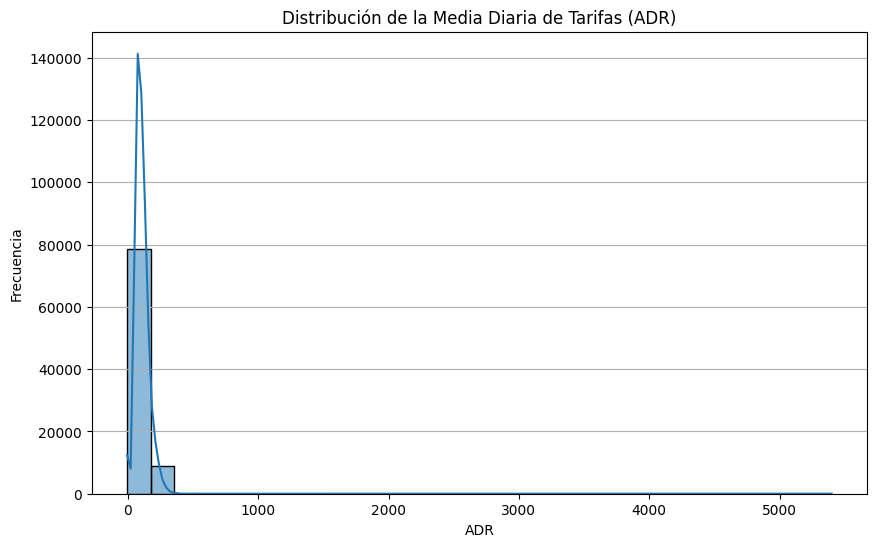

In [32]:
# Histograma de la Media Diaria de Tarifas (ADR)
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True)
plt.title('Distribución de la Media Diaria de Tarifas (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

plt.show()


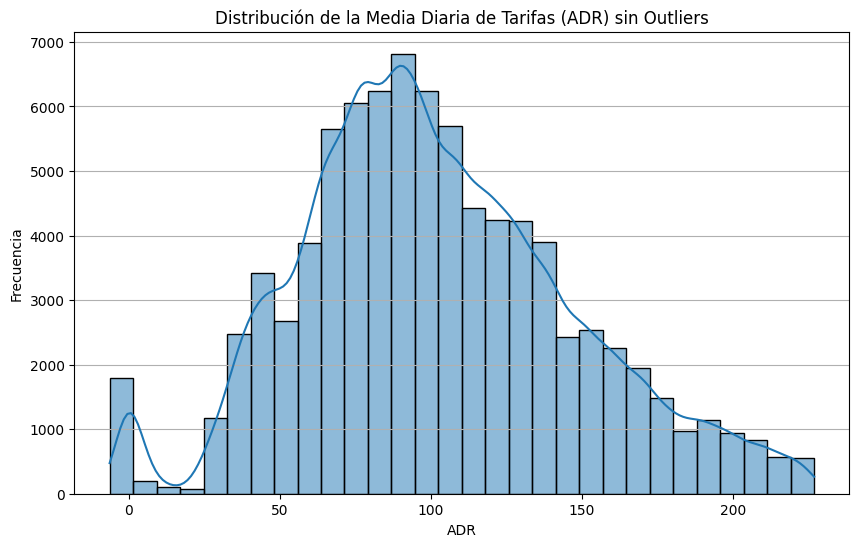

In [39]:
# Calcular el IQR
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# Identificar y eliminar los outliers
df = df[~((df['adr'] < (Q1 - 1.5 * IQR)) | (df['adr'] > (Q3 + 1.5 * IQR)))]

# Crear el nuevo histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True)
plt.title('Distribución de la Media Diaria de Tarifas (ADR) sin Outliers')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

##### Diagrama del Violin del Tiempo de Anticipación (Lead Time)


**Interpretacion**
* Alta concentración en valores bajos: La parte más ancha del violín se encuentra en la zona de valores bajos de tiempo de anticipación, lo que indica que la mayoría de las reservas se realizan con poca antelación.
* Cola larga hacia la derecha: La forma del violín se extiende hacia la derecha, formando una cola larga. Esto confirma la presencia de valores atípicos que ya habíamos observado en el boxplot, es decir, reservas realizadas con mucho tiempo de anticipación.
* Asimetría positiva: La distribución es claramente asimétrica positiva, lo que significa que hay más valores por debajo de la mediana que por encima.
* Densidad variable: La densidad de los datos varía a lo largo del eje x. Hay zonas con una mayor concentración de datos (picos) y otras con menor densidad.

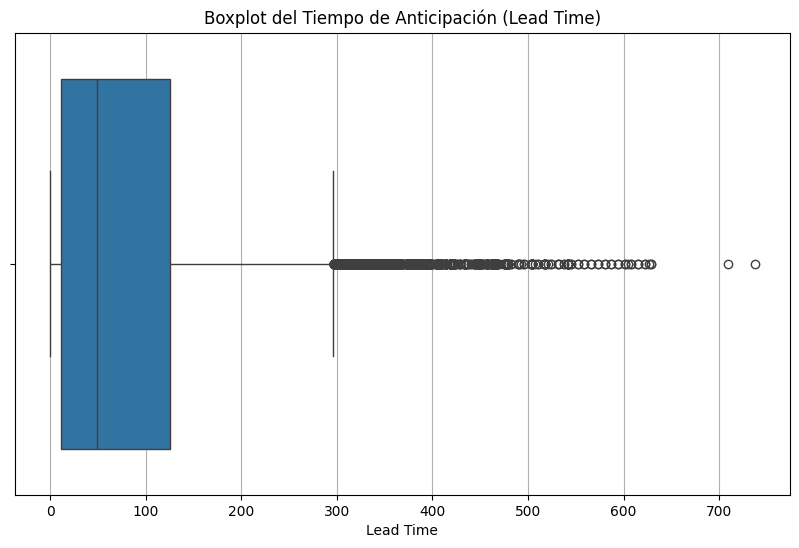

In [33]:
# Boxplot del Tiempo de Anticipación (Lead Time)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['lead_time'])
plt.title('Boxplot del Tiempo de Anticipación (Lead Time)')
plt.xlabel('Lead Time')
plt.grid(axis='x')

# Interpretación
# El boxplot muestra la mediana y los cuartiles del Tiempo de Anticipación.
# Se pueden observar algunos valores atípicos, indicando que hay reservas
# con tiempos de anticipación significativamente altos.
plt.show()


Rango intercuartílico: 114.0
Coeficiente de variación: 1.0788335689989854


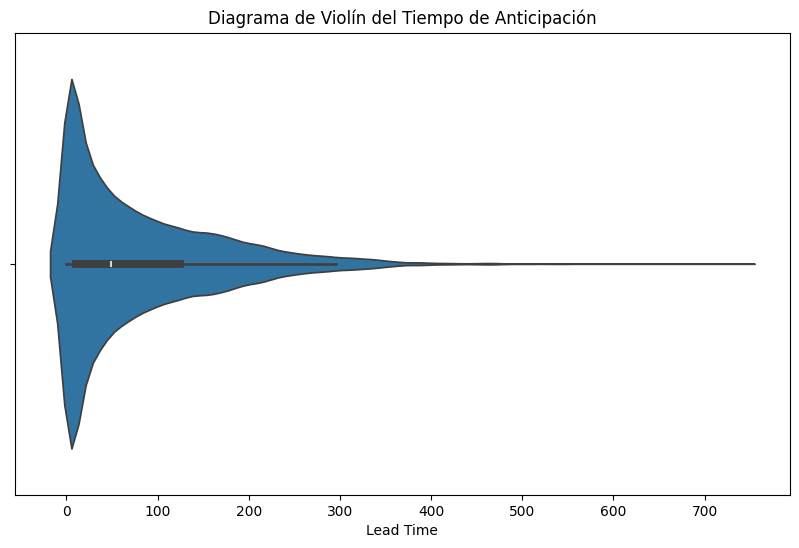

In [40]:
# Calcular métricas adicionales
print("Rango intercuartílico:", df['lead_time'].quantile(0.75) - df['lead_time'].quantile(0.25))
print("Coeficiente de variación:", df['lead_time'].std() / df['lead_time'].mean())

# Diagrama de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['lead_time'])
plt.title('Diagrama de Violín del Tiempo de Anticipación')
plt.xlabel('Lead Time')
plt.show()

##### Gráfico de Barras del Número de Adultos


**Interpretacion**
* Mayoría de reservas para 2 adultos: La barra más alta corresponde a las reservas realizadas para 2 adultos. Esto indica que la configuración más común es que dos personas reserven una habitación.
* Segundo lugar para 1 adulto: Le sigue en frecuencia las reservas para 1 adulto. Esto podría corresponder a viajeros solitarios o a personas que reservan habitaciones individuales.
* Disminución significativa a partir de 3 adultos: A medida que aumenta el número de adultos, la frecuencia de las reservas disminuye considerablemente. Esto sugiere que las reservas para grupos más grandes son menos comunes.
* Pocos casos 4 adultos: indica que esta configuracion es poco frecuentes. 

C:\Users\romi_\AppData\Local\Temp\ipykernel_16864\246335138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adults', data=df, palette='viridis')


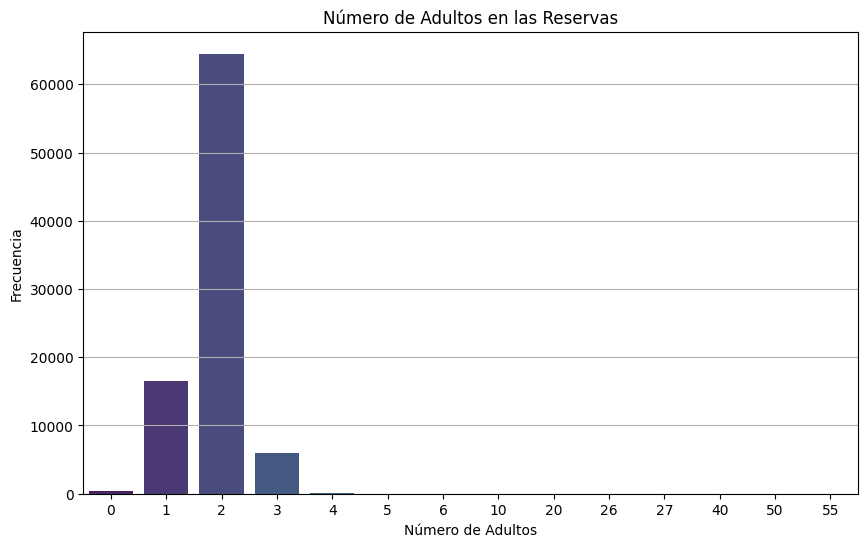

In [34]:
# Gráfico de Barras del Número de Adultos
plt.figure(figsize=(10, 6))
sns.countplot(x='adults', data=df, palette='viridis')
plt.title('Número de Adultos en las Reservas')
plt.xlabel('Número de Adultos')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

plt.show()


C:\Users\romi_\AppData\Local\Temp\ipykernel_16864\1988815988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adults', data=df_filtrado, palette='viridis')


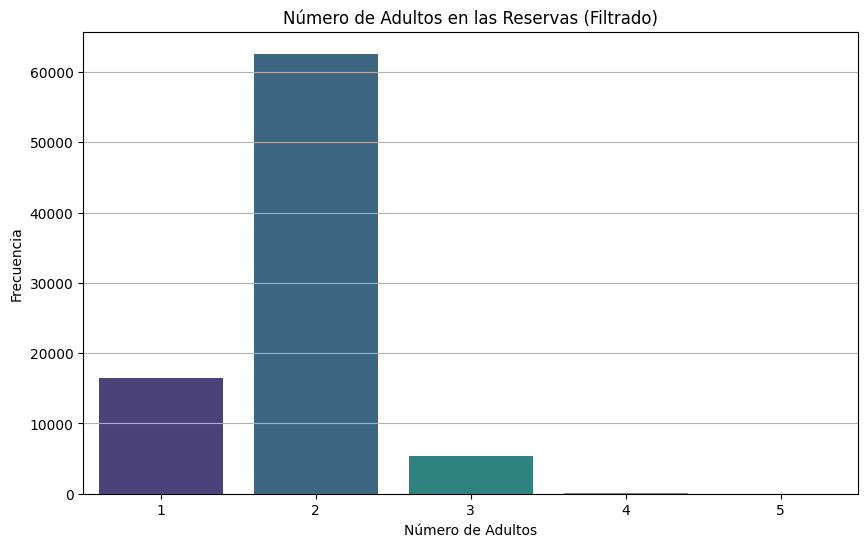

In [44]:
# Eliminar valores iguales a 0 y mayores a 5
df_filtrado = df[(df['adults'] > 0) & (df['adults'] <= 5)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='adults', data=df_filtrado, palette='viridis')
plt.title('Número de Adultos en las Reservas (Filtrado)')
plt.xlabel('Número de Adultos')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

### **Visualizaciones exploratorias multivariadas**
Crear dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

##### Gráfico de Dispersión entre ADR y Lead Time (sin outliers)


**Interpretación**
* Tendencia ligeramente negativa: A medida que aumenta el tiempo de anticipación, el ADR tiende a disminuir ligeramente. Esto sugiere que, en promedio, las reservas realizadas con mayor anticipación suelen tener un precio por noche ligeramente inferior.
* Dispersión de los datos: Los puntos en el gráfico están bastante dispersos, lo que indica que la relación entre ambas variables no es muy fuerte y que existen muchas excepciones a la tendencia general.
* Concentración en rangos específicos: La mayoría de las reservas se concentran en un rango de ADR entre 0 y 200, y en un rango de lead time entre 0 y 500 días.

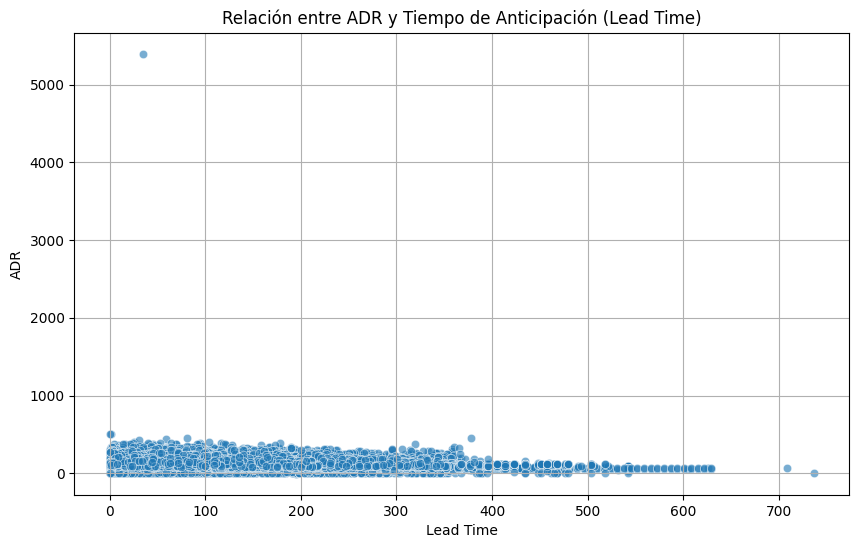

In [35]:
# Gráfico de Dispersión entre ADR y Lead Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.6)
plt.title('Relación entre ADR y Tiempo de Anticipación (Lead Time)')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.grid()

plt.show()


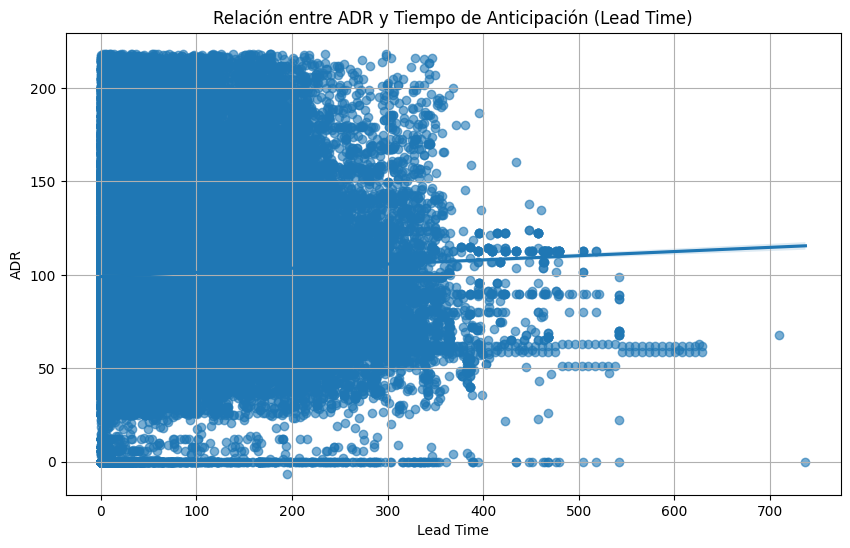

In [45]:
# Eliminar outliers (ejemplo utilizando IQR)
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
filtro = (df['adr'] >= Q1 - 1.5*IQR) & (df['adr'] <= Q3 + 1.5*IQR)
df_filtrado = df[filtro]

# Crear el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(x='lead_time', y='adr', data=df_filtrado, scatter_kws={'alpha':0.6})
plt.title('Relación entre ADR y Tiempo de Anticipación (Lead Time)')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.grid(True)
plt.show()

##### Gráfico de Barras Apiladas por Tipo de Hotel y Estado de Reserva

**Interpretación**
* Este gráfico de barras apiladas muestra la frecuencia de diferentes estados de reserva (canceladas, confirmadas, etc.) para cada tipo de hotel. 
* Es evidente que los hoteles de ciudad tienen un volumen de reservas significativamente mayor en comparación con los hoteles resort. 
* Ambos tipos de hoteles presentan una proporción similar de reservas canceladas. Esto sugiere que el factor de cancelación no está fuertemente influenciado por el tipo de hotel, sino más bien por otros factores.
* La categoría de "check-out" (reservas realizadas y completadas) es mayor en los hoteles de ciudad. Esto reafirma la idea de una mayor demanda y ocupación en este tipo de establecimientos.
* Tanto los hoteles de ciudad como los resort presentan una proporción relativamente baja de reservas no presentadas. Esto indica que la mayoría de los huéspedes que realizan una reserva finalmente se presentan en el hotel.


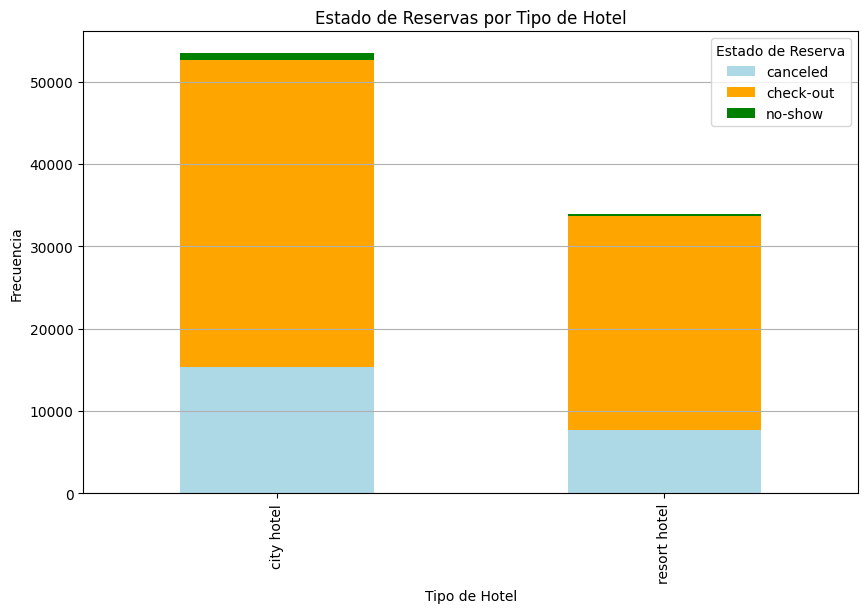

In [38]:
# Crear un DataFrame para contar el número de reservas por estado y tipo de hotel
reservas_counts = df.groupby(['hotel', 'reservation_status']).size().unstack(fill_value=0)

# Graficar
reservas_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange', 'green', 'salmon'])
plt.title('Estado de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Frecuencia')
plt.legend(title='Estado de Reserva')
plt.grid(axis='y')

plt.show()

##### Gráfico de dispersión de ADR vs. Lead Time segun Tipo de Hotel

* Los puntos en el gráfico están bastante dispersos, lo que indica que la relación entre el ADR y el lead time no es muy fuerte y que existen muchas excepciones a cualquier tendencia general.
* Tanto los resort hotels como los city hotels muestran patrones similares, con una gran dispersión de los datos y una tendencia general a precios más bajos para reservas con mayor anticipación.
* Tanto los resort hotels como los city hotels tienen un rango de precios similar, aunque los resort hotels tienden a tener precios ligeramente más altos en general.
* La mayoría de las reservas se concentran en un rango de ADR entre 0 y 200, y en un rango de lead time entre 0 y 500 días, tanto para resort hotels como para city hotels.

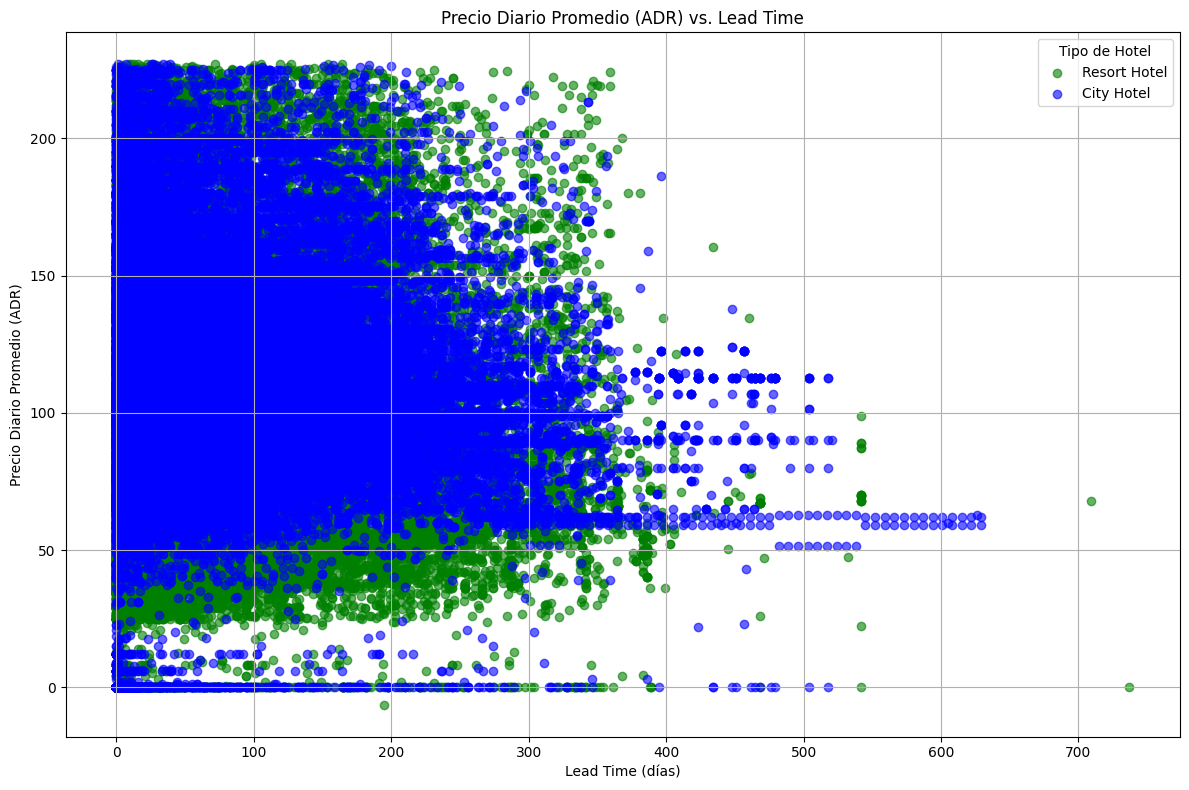

In [47]:
# Gráfico de dispersión de ADR vs. Lead Time
plt.figure(figsize=(12, 8))
colors = {'City Hotel': 'blue', 'Resort Hotel': 'green'}

# Convertir los nombres de los hoteles a un formato uniforme
df['hotel'] = df['hotel'].str.title()

# Graficar los puntos
for hotel_type in df['hotel'].unique():
    subset = df[df['hotel'] == hotel_type]
    plt.scatter(subset['lead_time'], subset['adr'], 
                color=colors.get(hotel_type, 'gray'),  # Usar 'gray' si no hay coincidencia
                alpha=0.6, 
                label=hotel_type)

plt.title('Precio Diario Promedio (ADR) vs. Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Precio Diario Promedio (ADR)')
plt.legend(title='Tipo de Hotel')
plt.grid()
plt.tight_layout()


plt.show()



### Análisis adicional:
* **Estadísticas descriptivas:** Proporcionar un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* **Identificación de tendencias:** Analizar y discutir cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [28]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['is_canceled', 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [29]:
def calcular_estadisticas(column, data):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(data))),
        'Media': np.nanmean(data),
        'Mediana': np.nanmedian(data),
        'Desviación Estándar': np.nanstd(data, ddof=1),
        'Mínimo': np.nanmin(data),
        'Máximo': np.nanmax(data),
        '25% Percentil': np.nanpercentile(data, 25),
        '75% Percentil': np.nanpercentile(data, 75)
    }
    return estadisticas

In [30]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}

# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas

# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]

# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)

# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
print(estadisticas_df)


Estadísticas Descriptivas (Redondeadas a 2 decimales):
                                 Cuenta   Media  Mediana  Desviación Estándar  \
is_canceled                     87392.0    0.27      0.0                 0.45   
lead_time                       87392.0   79.89     49.0                86.05   
arrival_date_week_number        87392.0   26.84     27.0                13.67   
stays_in_weekend_nights         87392.0    1.01      1.0                 1.03   
stays_in_week_nights            87392.0    2.63      2.0                 2.05   
adults                          87392.0    1.88      2.0                 0.63   
children                        87392.0    0.14      0.0                 0.46   
babies                          87392.0    0.01      0.0                 0.11   
is_repeated_guest               87392.0    0.04      0.0                 0.19   
previous_cancellations          87392.0    0.03      0.0                 0.37   
previous_bookings_not_canceled  87392.0    0.18      

**Análisis de las Variables:**

* **is_canceled:**
<br>La mayoría de las reservas no fueron canceladas (27% de cancelaciones).
<br>La distribución es sesgada hacia la derecha, ya que el 75% de las reservas no fueron canceladas.

* **lead_time:**
<br>El tiempo promedio de anticipación es de casi 80 días.
<br>La distribución es sesgada hacia la derecha, con un máximo de 737 días y un 75% de reservas con menos de 125 días de anticipación.

* **arrival_date_week_number:**
<br>La mayoría de las reservas se realizaron en la semana 27.
<br>La distribución es relativamente simétrica, con una desviación estándar moderada.

* **stays_in_weekend_nights y stays_in_week_nights:**
<br>La mayoría de las reservas incluyen una noche de estadía de fin de semana y dos noches de estadía entre semana.
<br>Ambas variables tienen distribuciones sesgadas hacia la derecha, con algunos valores extremos.

* **adults, children, babies:**
<br>La mayoría de las reservas son para dos adultos.
<br>La presencia de niños y bebés es baja.
<br>Las distribuciones son sesgadas hacia la derecha, con algunos valores extremos.

* **is_repeated_guest, previous_cancellations, previous_bookings_not_canceled:**
<br>La mayoría de los huéspedes no son huéspedes repetidos y no tienen historial de cancelaciones o reservas anteriores.
<br>Las distribuciones son sesgadas hacia la derecha, con algunos valores extremos.

* **booking_changes:**
<br>La mayoría de las reservas no tuvieron cambios.
<br>La distribución es sesgada hacia la derecha, con un máximo de 21 cambios.

* **days_in_waiting_list:**
<br>La mayoría de las reservas no tuvieron tiempo de espera.
<br>La distribución es sesgada hacia la derecha, con un máximo de 391 días de espera.

* **adr:**
<br>La tarifa promedio diaria es de 106.34 unidades monetarias.
<br>La distribución es sesgada hacia la derecha, con un máximo de 5400 unidades monetarias y un 25% de reservas con una tarifa menor a 72 unidades monetarias.

* **required_car_parking_spaces:**
<br>La mayoría de las reservas no requirieron estacionamiento.
<br>La distribución es sesgada hacia la derecha, con un máximo de 8 espacios requeridos.

* **total_of_special_requests:**
<br>La mayoría de las reservas no tuvieron solicitudes especiales.
<br>La distribución es sesgada hacia la derecha, con un máximo de 5 solicitudes especiales.

**Conclusiones:**

* La mayoría de las reservas son para huéspedes nuevos, sin historial de cancelaciones o reservas anteriores.
* La duración promedio de las estadías es de 3.63 noches.
* La mayoría de las reservas no requieren estacionamiento.
* La tarifa promedio diaria es de 106.34 unidades monetarias, con una amplia variación.


Matriz de Correlación (Pearson):
                                is_canceled  lead_time  \
is_canceled                        1.000000   0.184887   
lead_time                          0.184887   1.000000   
arrival_date_week_number           0.001414   0.101169   
stays_in_weekend_nights            0.060214   0.235142   
stays_in_week_nights               0.082948   0.310132   
adults                             0.081778   0.140523   
children                           0.067396   0.028638   
babies                            -0.020537  -0.003618   
is_repeated_guest                 -0.089633  -0.147014   
previous_cancellations             0.051477   0.005371   
previous_bookings_not_canceled    -0.052149  -0.078937   
booking_changes                   -0.093622   0.077014   
days_in_waiting_list               0.004470   0.132151   
adr                                0.128103   0.023508   
required_car_parking_spaces       -0.184196  -0.086555   
total_of_special_requests         -0.1

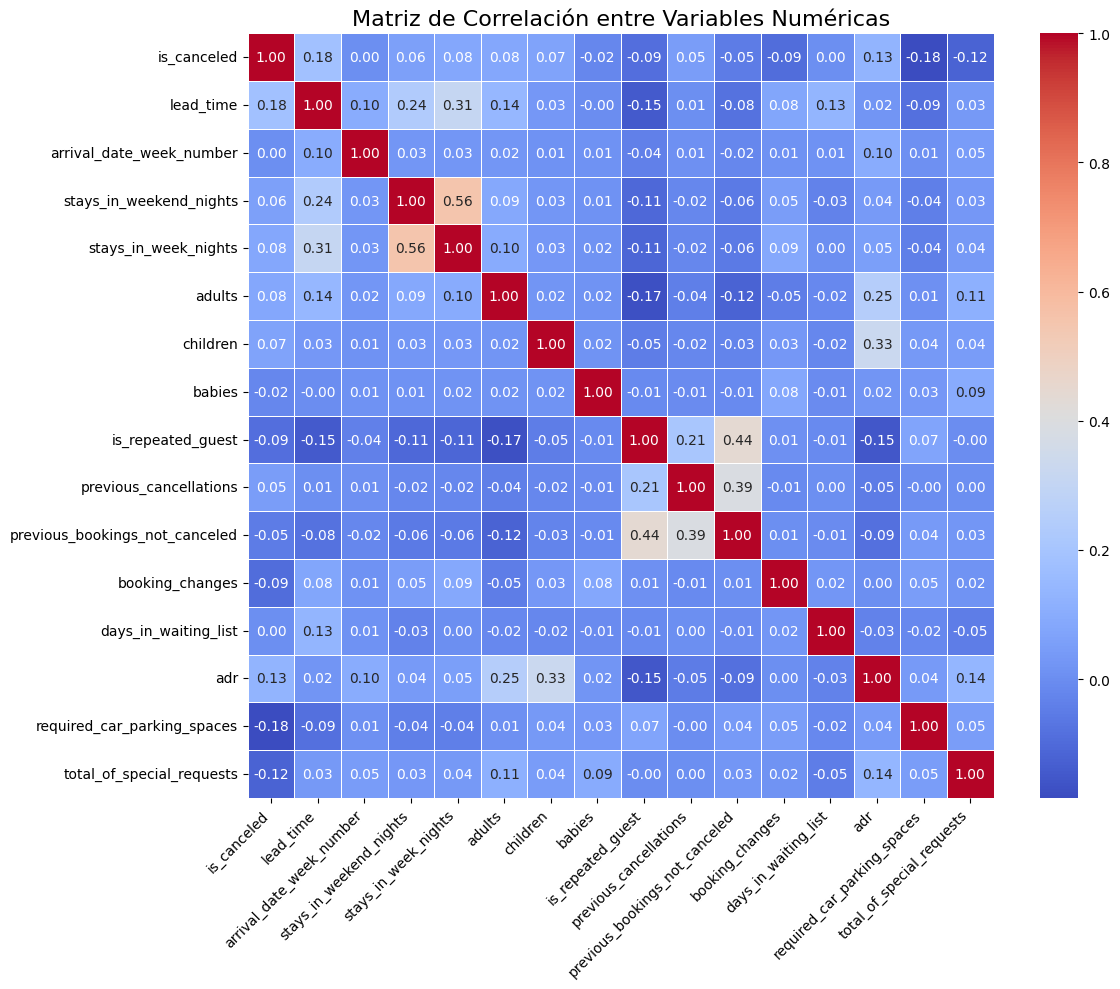

In [31]:
# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_numericas].corr(method='pearson')

# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")
print(matriz_correlacion)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Interpretacion:**<br>

A simple vista, se puede observar que:
* Hay pocas correlaciones fuertes: La mayoría de los valores están cerca de 0, lo que sugiere que la mayoría de las variables no están muy relacionadas entre sí.

Algunas correlaciones interesantes:
* "stays_in_weekend_nights" y "stays_in_week_nights": Tienen una correlación positiva moderada, lo que indica que las personas que se quedan más fines de semana también tienden a quedarse más días entre semana.
* "adults" y "children": También tienen una correlación positiva moderada, lo que sugiere que las reservas con más adultos suelen tener más niños.
* Variables relacionadas con cancelaciones: "is_repeated_guest", "previous_cancellations" y "previous_bookings_not_canceled" muestran una correlación positiva entre sí, lo que indica que los huéspedes que han cancelado antes tienen más probabilidades de volver a cancelar.
* "is_canceled" no tiene una correlación fuerte con ninguna otra variable: Esto sugiere que la cancelación de una reserva no está fuertemente influenciada por ninguna de las otras variables analizadas.


### Entrega
* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* **NOTA:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

### Notas
* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.